In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_pickle('merged_data.pkl')

In [3]:
data.replace("",np.nan,inplace=True)
data

,ID,Species Name,Common Name,Authors,Year,Genus,Subfamily,Family,Order,Class,...,Fertilization,fisheries,aquarium,gamefish,aquaculture,bait,Image,Img Credits,Reference,Env Section
0,64588,Aapticheilichthys websteri,NaN,Huber,2007,Aapticheilichthys,Procatopodinae,Procatopodidae,Cyprinodontiformes,Actinopteri,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.fishbase.de//images/thumbnails/jpg...,"Musschoot, T.","Huber, J.H., 2007. Procatopus websteri: a new ...",Freshwater; benthopelagic. Tropical
1,16239,Aaptosyax grypus,Giant salmon carp,Rainboth,1991,Aaptosyax,Cyprininae,Cyprinidae,Cypriniformes,Actinopteri,...,external,NaN,NaN,NaN,NaN,NaN,https://www.fishbase.de//images/thumbnails/gif...,NaN,"Roberts, T.R. and T.J. Warren, 1994. Observati...",Freshwater; pelagic; potamodromous (Ref. 5124...
2,2347,Abactochromis labrosus,NaN,Trewavas,1935,Abactochromis,Pseudocrenilabrinae,Cichlidae,Cichliformes,Actinopteri,...,in mouth,NaN,commercial,NaN,NaN,NaN,https://www.fishbase.de//images/thumbnails/jpg...,"Dubosc, J.","Oliver, M.K. and M.E. Arnegard, 2010. A new ge...",Freshwater; demersal; pH range: 7.0 - 8.5; dH...
3,62612,Abalistes filamentosus,NaN,"Matsuura, Yoshino",2004,Abalistes,NaN,Balistidae,Tetraodontiformes,Actinopteri,...,external,NaN,NaN,NaN,NaN,NaN,https://www.fishbase.de//images/thumbnails/jpg...,"Justine, J.-L.","Matsuura, K. and T. Yoshino, 2004. A new trigg...",Marine; pelagic-neritic; depth range 61 - 180...
4,9,Abalistes stellatus,Starry triggerfish,Anonymous,1798,Abalistes,NaN,Balistidae,Tetraodontiformes,Actinopteri,...,external,commercial,commercial,NaN,NaN,NaN,https://www.fishbase.de//images/thumbnails/jpg...,"Randall, J.E.","Matsuura, K., 2001. Balistidae. Triggerfishes....",Marine; demersal; amphidromous (Ref. 51243); ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34772,63393,Zungaro jahu,NaN,Ihering,1898,Zungaro,NaN,Pimelodidae,Siluriformes,Actinopteri,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.fishbase.de//images/thumbnails/jpg...,"Timm, C.D.","Lundberg, J.G. and M.W. Littmann, 2003. Pimelo...",Freshwater; benthopelagic. Tropical
34773,47756,Zungaro zungaro,Gilded catfish,Humboldt,1821,Zungaro,NaN,Pimelodidae,Siluriformes,Actinopteri,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.fishbase.de//images/thumbnails/jpg...,"Sabaj Pérez, M.H.","Silfvergrip, A.M.C., 1992. Zungaro, a senior s...",Freshwater; demersal; pH range: 6.5 - 7.2; dH...
34774,63635,Zungaropsis multimaculatus,NaN,Steindachner,1908,Zungaropsis,NaN,Pimelodidae,Siluriformes,Actinopteri,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.fishbase.de//images/thumbnails/gif...,NaN,"Ferraris, C.J. Jr., 2007. Checklist of catfish...",Freshwater; demersal. Tropical
34775,11898,Semaprochilodus taeniurus,Silver prochilodus,Valenciennes,1821,Semaprochilodus,NaN,Prochilodontidae,Characiformes,Actinopteri,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.fishbase.de//images/thumbnails/jpg...,Hippocampus-Bildarchiv,"Castro, R.M.C. and R.P. Vari, 2003. Prochilodo...",Freshwater; benthopelagic; pH range: 5.5 - 7....


In [4]:
data['Env Section'].fillna("",inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34777 entries, 0 to 34776
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    34777 non-null  int64 
 1   Species Name          34777 non-null  object
 2   Common Name           16883 non-null  object
 3   Authors               34777 non-null  object
 4   Year                  34777 non-null  object
 5   Genus                 34777 non-null  object
 6   Subfamily             21136 non-null  object
 7   Family                34776 non-null  object
 8   Order                 34776 non-null  object
 9   Class                 34776 non-null  object
 10  Phylum                34777 non-null  object
 11  Kingdom               34777 non-null  object
 12  Environment           34775 non-null  object
 13  Habitat               34775 non-null  object
 14  Migration             22747 non-null  object
 15  IUCN Status           34775 non-null

In [6]:
# Filling missing value for one species (Family, Order, Class)
data.iloc[5689,7:10] = data.iloc[5688,7:10]
data.iloc[5689:5690]

,ID,Species Name,Common Name,Authors,Year,Genus,Subfamily,Family,Order,Class,...,Fertilization,fisheries,aquarium,gamefish,aquaculture,bait,Image,Img Credits,Reference,Env Section
5689,663,Centroscymnus crepidater,Longnose velvet dogfish,"Barbosa du Bocage, de Brito Capello",1864,Centroscymnus,NaN,Somniosidae,Squaliformes,Elasmobranchii,...,internal (oviduct),minor commercial,NaN,NaN,NaN,NaN,https://www.fishbase.de//images/thumbnails/jpg...,"Cambraia Duarte, P.M.N. (c)ImagDOP","Compagno, L.J.V., 1984. FAO Species Catalogue....",Marine; bathydemersal; depth range 230 - 1500...


In [7]:
#Fixing the species containing 2 orders separated by '/'
data['Order'] = data['Order'].apply(lambda x :x.split('/')[0])

### Fixing Habitat

In [8]:
data['Habitat'] = data['Habitat'].apply(lambda x : str(x).split(',')[0].split('(')[0])
data['Habitat'].replace('nan',np.nan,inplace = True)

In [9]:
errorHbIdx = data[(data['Habitat']== 'freshwater') | (data['Habitat']=='brackish')].index
data['Environment'][errorHbIdx] = data['Environment'][errorHbIdx] + ', ' + data['Habitat'][errorHbIdx]

C:\Users\SANYAM\AppData\Local\Temp/ipykernel_9260/465667575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Environment'][errorHbIdx] = data['Environment'][errorHbIdx] + ', ' + data['Habitat'][errorHbIdx]


In [10]:
habitats = ['benthopelagic', 'bathypelagic', 'pelagic-neritic', 'pelagic-oceanic', 'pelagic', 
            'bathydemersal', 'reef-associated','demersal']
for idx in errorHbIdx:
    data['Habitat'][idx] = np.nan
    for hb in habitats:
        if hb in data['Env Section'][idx]:
            data['Habitat'][idx] = hb
            break

C:\Users\SANYAM\AppData\Local\Temp/ipykernel_9260/2712926725.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Habitat'][idx] = np.nan
C:\Users\SANYAM\AppData\Local\Temp/ipykernel_9260/2712926725.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Habitat'][idx] = hb


In [11]:
data['Habitat'].value_counts()

demersal           12006
benthopelagic      10877
reef-associated     4938
bathydemersal       2277
pelagic             1878
bathypelagic        1407
pelagic-neritic      903
pelagic-oceanic      489
Name: Habitat, dtype: int64

### Fixing Migration

In [12]:
data['Migration'].isnull().sum(), data['Migration'].value_counts()

(12030,
 non-migratory                     1009
 brackish                           755
 demersal                           598
 oceanodromous                      546
 non-migratory. Tropical            388
                                   ... 
 depth range 18 - 193 m               1
 depth range 16 - ? m                 1
 depth range 14 - 16 m                1
 26°N -   28°S, 101°E -   123°W       1
 depth range ? - 96 m                 1
 Name: Migration, Length: 7851, dtype: int64)

In [13]:
prefixes = ['depth', 'pH', 'dH', '?','-']
data['Migration'][~data['Migration'].isnull() & (data['Migration'].str.startswith(tuple(prefixes)))] = np.nan

C:\Users\SANYAM\AppData\Local\Temp/ipykernel_9260/3092475139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Migration'][~data['Migration'].isnull() & (data['Migration'].str.startswith(tuple(prefixes)))] = np.nan


In [14]:
data['Migration'][~data['Migration'].isnull() & (data['Migration'].str[0].str.isdigit())] = np.nan

C:\Users\SANYAM\AppData\Local\Temp/ipykernel_9260/1898018314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Migration'][~data['Migration'].isnull() & (data['Migration'].str[0].str.isdigit())] = np.nan


In [15]:
data['Migration'] = data['Migration'].apply(lambda x : str(x).split(',')[0].split('.')[0])
data['Migration'].replace('nan',np.nan,inplace=True)

In [16]:
data['Migration'].value_counts()

non-migratory       1574
demersal            1029
brackish             755
benthopelagic        574
oceanodromous        551
reef-associated      359
potamodromous        343
pelagic-neritic      182
pelagic               90
amphidromous          84
pelagic-oceanic       23
bathydemersal         10
anadromous             8
bathypelagic           4
diadromous             1
potamodromous?         1
oceano-estuarine       1
Name: Migration, dtype: int64

In [17]:
data['Migration'][data['Migration']=='potamodromous?'] = 'potamodromous'

C:\Users\SANYAM\AppData\Local\Temp/ipykernel_9260/2575667500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Migration'][data['Migration']=='potamodromous?'] = 'potamodromous'


In [18]:
data['Migration'][data['Migration']=='oceano-estuarine']= 'non-migratory'

C:\Users\SANYAM\AppData\Local\Temp/ipykernel_9260/4289756979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Migration'][data['Migration']=='oceano-estuarine']= 'non-migratory'


In [19]:
migrations = ['anadromous', 'catadromous', 'amphidromous', 'potamodromous', 'limnodromous', 'oceanodromous', 'non-migratory']
for idx in data.index:
    if data['Migration'][idx] in migrations:
        continue
    else:
        data['Migration'][idx] = np.nan
        for mig in migrations:
            if data['Env Section'][idx]!='' and mig in data['Env Section'][idx]:
                data['Migration'][idx] = mig
                break

C:\Users\SANYAM\AppData\Local\Temp/ipykernel_9260/3508264423.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Migration'][idx] = np.nan
C:\Users\SANYAM\AppData\Local\Temp/ipykernel_9260/3508264423.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Migration'][idx] = mig


In [20]:
data['Migration'].value_counts()

non-migratory    1998
oceanodromous     725
potamodromous     576
amphidromous      479
anadromous        170
catadromous        77
Name: Migration, dtype: int64

### Fixing IUCN Status

In [21]:
data['IUCN Status'].value_counts()

Least Concern                                      13580
Not Evaluated                                      12789
Data deficient                                      4408
Vulnerable                                          1388
Endangered                                          1076
Near Threatened                                      745
Critically Endangered                                686
Extinct                                               74
Extinct in the Wild                                   10
Lower Risk: near threatened                            8
Lower Risk: least concern                              5
Least Concern ; Date assessed: 15 February 2019        1
Least Concern ; Date assessed: 04 June 2019            1
Endangered                                             1
Least Concern ; Date assessed: 01 May 2009             1
Least Concern ; Date assessed: 28 December 2019        1
Least Concern ; Date assessed: 15 August 2019          1
Name: IUCN Status, dtype: int64

In [22]:
data['IUCN Status'] = data['IUCN Status'].apply(lambda x : str(x).split(';')[0])

In [23]:
data['IUCN Status'].replace("nan",np.nan,inplace=True)

In [24]:
data['IUCN Status'].value_counts()

Least Concern                   13580
Not Evaluated                   12789
Data deficient                   4408
Vulnerable                       1388
Endangered                       1076
Near Threatened                   745
Critically Endangered             686
Extinct                            74
Extinct in the Wild                10
Lower Risk: near threatened         8
Lower Risk: least concern           5
Least Concern                       5
Endangered                          1
Name: IUCN Status, dtype: int64

### Fixing Max Weight

In [25]:
data['Max Weight'] = data['Max Weight'].apply(lambda x : str(x).split('(')[0])
data['Max Weight'].replace('nan',np.nan,inplace=True)

### Fixing pH and dH ranges

In [26]:
data['pH'] = data['pH'].apply(lambda x : str(x).split(',')[0].split('. S')[0])
data['pH'] = data['pH'].apply(lambda x : str(x).split(',')[0].split('. T')[0])
data['pH'] = data['pH'].apply(lambda x : str(x).split(',')[0].split('. H')[0])
data['pH'] = data['pH'].apply(lambda x : str(x).split(',')[0].split(',')[0])

In [27]:
data['dH'] = data['dH'].apply(lambda x : str(x).split(',')[0].split('. T')[0])
data['dH'] = data['dH'].apply(lambda x : str(x).split(',')[0].split(',')[0])

In [28]:
data['pH'].replace('nan',np.nan, inplace = True)
data['dH'].replace('nan',np.nan, inplace = True)

In [29]:
data['dH'].value_counts()

2 - 25     128
? - 15     125
? - 20     103
5 - 19      88
5 - 12      77
          ... 
9 - 12       1
8 - 30       1
1 - 19       1
2 - 30       1
10 - 35      1
Name: dH, Length: 178, dtype: int64

### Saving the data

In [30]:
data.to_csv('cleaned_data1.csv', index = False)

In [31]:
data.to_pickle('clean_data1.pkl')

### Plotting Non-Null Values

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
dataCount = data.count()
dataCount

ID                      34777
Species Name            34777
Common Name             16883
Authors                 34777
Year                    34777
Genus                   34777
Subfamily               21136
Family                  34777
Order                   34777
Class                   34777
Phylum                  34777
Kingdom                 34777
Environment             34775
Habitat                 34775
Migration                4025
IUCN Status             34775
Threat Level            34543
Climate                 30640
Area                    34775
Max Length              31524
Max Weight               2536
Max Age                  1374
Depth Range             15392
pH                       2279
dH                       1801
Mode of Reproduction    11782
Fertilization           11523
fisheries                5019
aquarium                 2105
gamefish                  873
aquaculture               322
bait                      261
Image                   34777
Img Credit

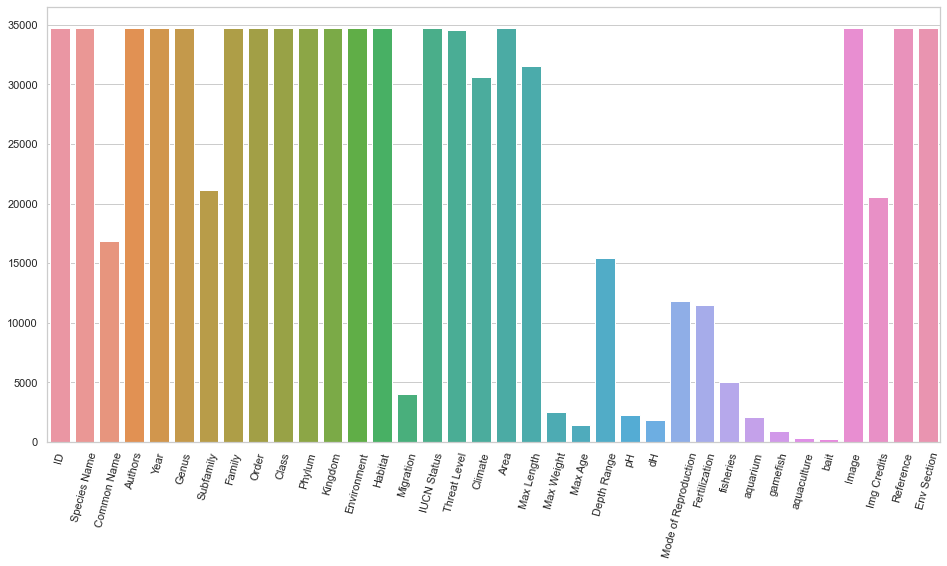

In [34]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(16)
sns.set(style="whitegrid", color_codes=True)
plots = sns.barplot(x = dataCount.index, y = dataCount.values)
plt.xticks(rotation = 75)
plt.show()